<a href="https://colab.research.google.com/github/vaidhyesh1/walmart-assignment/blob/main/walmart_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0    90000
1     4000
Name: default, dtype: int64


Normalized data
         A1        A2        A3  ...       A29       A30  default
0  0.170467  0.824606  0.338738  ...  0.069506  0.050661        0
1  0.454473  0.560757  0.249264  ...  0.069786  0.053635        0
2  0.396587  0.669274  0.162738  ...  0.076029  0.051711        0
3  0.217509  0.821073  0.261551  ...  0.082634  0.050661        0
4  0.071759  0.948517  0.332143  ...  0.069506  0.050661        0

[5 rows x 31 columns]


Data after PCA
     X axis    Y axis  default
0 -0.115883  0.041944        0
1  0.349826  0.254053        0
2  0.344980 -0.000110        0
3 -0.003360 -0.116941        0
4 -0.181246 -0.166241        0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




Summary for Logisitic Regression
[[9112  888]
 [ 723  777]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     10000
           1       0.47      0.52      0.49      1500

    accuracy                           0.86     11500
   macro avg       0.70      0.71      0.70     11500
weighted avg       0.87      0.86      0.86     11500



Summary for Neural Networks with 8,8,8 hidden layers
[[9523  477]
 [ 944  556]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10000
           1       0.54      0.37      0.44      1500

    accuracy                           0.88     11500
   macro avg       0.72      0.66      0.68     11500
weighted avg       0.86      0.88      0.87     11500



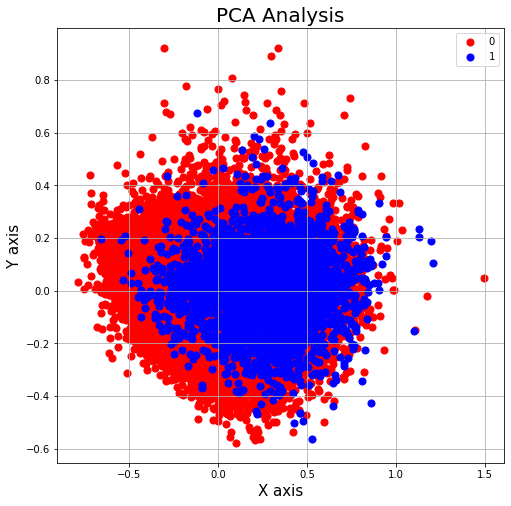

In [19]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler


#Initialization of the training and testing datasets
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/walmart/model.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/walmart/val.csv')
column_names = df_train.columns 

#Checking the counts of element in each class
print(df_train['default'].value_counts())
#It is found that there are 90k samples of class 0 and 4k samples of class 1. The data is not balanced

#MinMaxScaler normalizes the columns from 0 to 1
scaler = preprocessing.MinMaxScaler()
df_train_without_default = df_train.drop(['default'], axis=1)
preprocess_df = scaler.fit_transform(df_train_without_default)
normalized_df_train = pd.DataFrame(preprocess_df,columns=column_names[:-1])
df_train_final = pd.concat([normalized_df_train, df_train[['default']]], axis=1)
print("\n")
print('Normalized data')
print(df_train_final.head())

#Normalizing test data for future usage
df_test_without_default = df_test.drop(['default'], axis=1)
preprocess_df_test = scaler.fit_transform(df_test_without_default)
X_test = pd.DataFrame(preprocess_df_test, columns=column_names[:-1])
y_test = df_test.default

#Running PCA for 2 components and plotting it for better idea of the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df_train)
principal_df = pd.DataFrame(data = principal_components, columns = ['X axis', 'Y axis'])
final_principal_df = pd.concat([principal_df, df_train[['default']]], axis=1)
print("\n")
print('Data after PCA')
print(final_principal_df.head())

#Plotting the data on the graph
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('X axis', fontsize = 15)
ax.set_ylabel('Y axis', fontsize = 15)
ax.set_title('PCA Analysis', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_principal_df['default'] == target
    ax.scatter(final_principal_df.loc[indicesToKeep, 'X axis']
               , final_principal_df.loc[indicesToKeep, 'Y axis']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Running undersampling because the data is unbalanced
rus = RandomUnderSampler() 
X_train = normalized_df_train
y_train = df_train.default
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

#After analysis we see that even if there are some outliers, the samples are seperable. Therefore running logistic regression
logistic_reg = LogisticRegression(max_iter=500)
logistic_reg.fit(X_train_undersampled,y_train_undersampled)
y_pred_logistic = logistic_reg.predict(X_test)
logistic_results_df = pd.DataFrame(y_pred_logistic)
logistic_results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/walmart/results1.csv',header=False,index=False)
print("\n")
print("Summary for Logisitic Regression")
print(confusion_matrix(y_test,y_pred_logistic))
print(classification_report(y_test,y_pred_logistic))

#Running Neural Networks
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_undersampled,y_train_undersampled)
y_pred_mlp = mlp.predict(X_test)
mlp_results_df = pd.DataFrame(y_pred_mlp)
mlp_results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/walmart/results2.csv',header=False,index=False)
print("\n")
print("Summary for Neural Networks with 8,8,8 hidden layers")
print(confusion_matrix(y_test,y_pred_mlp))
print(classification_report(y_test,y_pred_mlp))


In [35]:
import collections
collections.Counter(y_pred)

Counter({0: 11480, 1: 20})